# Zindi Urban Air pullution prediction challenge-6th position solution

In [1]:
# Importing data
import pandas as pd
Train=pd.read_csv('Train.csv')
Test=pd.read_csv('Test.csv')

In [39]:
Train['Date'] = pd.to_datetime(Train['Date'])
Test['Date'] = pd.to_datetime(Test['Date'])
Train['Day'] = Train['Date'].dt.day
Train['Month'] = Train['Date'].dt.month
Train['Year'] = Train['Date'].dt.year

Test['Day'] = Test['Date'].dt.day
Test['Month'] = Test['Date'].dt.month
Test['Year'] = Test['Date'].dt.year
Train=Train.drop(['Date','target_min','target_max','target_variance','target_count'],axis=1)
Test=Test.drop(['Date'],axis=1)

In [41]:
Train['total_days_month'] = Train['Month'].apply(lambda x: 31 if x==1 else (28+31 if x==2 else (28+31+31 if x==1 else 28+30+31+31))) 
Train['total_days'] = Train['total_days_month'] + train['Day']

Test['total_days_month'] = Test['Month'].apply(lambda x: 31 if x==1 else (28+31 if x==2 else (28+31+31 if x==1 else 28+30+31+31))) 
Test['total_days'] = Test['total_days_month'] + test['Day']

In [62]:
corrmat = Train.corr()
corrmat[corrmat['target']>0.2].target.index

<ipython-input-62-3257bcdebcd5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = Train.corr()


Index(['target', 'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_CO_CO_column_number_density',
       'L3_HCHO_HCHO_slant_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density'],
      dtype='object')

In [70]:
columns=Train.columns
columns=list(columns)
x = 2

In [71]:
Train=Train[columns]
Test=Test[columns[:x] + columns[x+1:]]


In [72]:
Train.head()

,Place_ID X Date,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,Day,Month,Year,total_days_month,total_days
0,010Q650 X 2020-01-02,010Q650,38.0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,...,0.010579,74.481049,37.501499,-62.142639,22.545118,2,1,2020,31,32
1,010Q650 X 2020-01-03,010Q650,39.0,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,...,0.015104,75.630043,55.657486,-53.868134,19.293652,3,1,2020,31,33
2,010Q650 X 2020-01-04,010Q650,24.0,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,...,NaN,NaN,NaN,NaN,NaN,4,1,2020,31,34
3,010Q650 X 2020-01-05,010Q650,49.0,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,...,NaN,NaN,NaN,NaN,NaN,5,1,2020,31,35
4,010Q650 X 2020-01-06,010Q650,21.0,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,...,NaN,NaN,NaN,NaN,NaN,6,1,2020,31,36


In [73]:
Test.head()

,Place_ID X Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,...,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,Day,Month,Year,total_days_month,total_days
0,0OS9LVX X 2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,...,NaN,NaN,NaN,NaN,NaN,2,1,2020,31,29.507246
1,0OS9LVX X 2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,...,NaN,NaN,NaN,NaN,NaN,3,1,2020,31,29.619581
2,0OS9LVX X 2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,...,NaN,NaN,NaN,NaN,NaN,4,1,2020,31,29.731915
3,0OS9LVX X 2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,0.000155,...,NaN,NaN,NaN,NaN,NaN,5,1,2020,31,29.844249
4,0OS9LVX X 2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,0.000131,...,0.031068,-100.278343,41.84708,-95.910744,28.498789,6,1,2020,31,29.956584


In [74]:
Train.describe()

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,...,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,Day,Month,Year,total_days_month,total_days
count,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,28368.000000,28368.000000,28368.000000,...,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,30557.000000,30557.000000,30557.0,30557.000000,30557.000000
mean,61.148045,15.302326,70.552747,0.006004,9.321342,0.416886,0.088486,0.000094,0.000163,-1.093982,...,0.016227,1.254703,13.849040,-69.098594,23.100630,15.254312,2.095755,2020.0,72.719835,86.974147
std,46.861309,10.688573,18.807884,0.003787,9.343226,2.707990,2.641924,0.000094,0.000109,0.610955,...,0.027016,55.101250,18.004375,84.702355,24.786350,8.921199,0.899081,0.0,37.962731,38.257836
min,1.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,-15.023647,-0.000051,0.000000,-3.941742,...,0.000000,-105.367363,0.000000,-179.947422,0.000000,1.000000,1.000000,2020.0,31.000000,32.000000
25%,25.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,-1.415701,0.000056,0.000122,-1.514681,...,0.000000,0.000000,0.000000,-161.726937,0.000000,7.000000,1.000000,2020.0,31.000000,55.000000
50%,50.000000,12.200000,74.099998,0.004912,8.478424,0.222092,0.012847,0.000075,0.000150,-1.168333,...,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,2020.0,59.000000,75.000000
75%,80.000000,19.900000,85.450001,0.007562,16.201563,1.772925,1.555559,0.000111,0.000189,-0.743363,...,0.023829,62.245728,27.412303,0.000000,47.090635,23.000000,3.000000,2020.0,120.000000,127.000000
max,815.000000,72.599998,100.000000,0.021615,37.437921,17.955124,15.055530,0.002998,0.002431,4.824802,...,0.210483,77.355232,59.972710,179.813344,69.992363,31.000000,4.000000,2020.0,120.000000,150.000000


In [75]:
train=Train
test=Test
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
train=train.apply(LabelEncoder().fit_transform)
test=test.apply(LabelEncoder().fit_transform)
#train= train.drop( columns= [x for x in train if train[x].isna().sum() > 23000 ])
train=train.fillna(0)
test=test.fillna(0)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   Place_ID X Date                                      30557 non-null  int64
 1   Place_ID                                             30557 non-null  int64
 2   target                                               30557 non-null  int64
 3   precipitable_water_entire_atmosphere                 30557 non-null  int64
 4   relative_humidity_2m_above_ground                    30557 non-null  int64
 5   specific_humidity_2m_above_ground                    30557 non-null  int64
 6   temperature_2m_above_ground                          30557 non-null  int64
 7   u_component_of_wind_10m_above_ground                 30557 non-null  int64
 8   v_component_of_wind_10m_above_ground                 30557 non-null  int64
 9   L3_NO2

# Splitting Data

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X=train.drop(['target'], axis = 1)
y=train.target
X=(X-X.min())/(X.max()-X.min())
X=(X-X.mean())/X.std()
test=(test-test.min())/(test.max()-test.min())
test=(test-test.mean())/test.std()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,shuffle=True, random_state = 1234)

In [77]:
import lightgbm as lgb
params = {
    'objective' :'regression',
    'learning_rate' : 0.0854838853834543,
    'num_iterations': 30000,
    'max_bins': 1023, 
    'max_depth' :7 ,
    'num_leaves' : 72,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'rmse' ,
     'min_data_in_leaf':5,
    'reg_lambda' :0.007909948069730437,
}

train_set = lgb.Dataset(X_train, y_train, silent=False,categorical_feature=['Year','Month','Day'])
valid_set = lgb.Dataset(X_train, y_train, silent=False,categorical_feature=['Year','Month','Day'])
model = lgb.train(params, train_set = train_set, num_boost_round=10000,early_stopping_rounds=500,
                  verbose_eval=500, valid_sets=valid_set)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 500 rounds
[500]	valid_0's rmse: 11.8138
[1000]	valid_0's rmse: 5.85808
[1500]	valid_0's rmse: 3.06874
[2000]	valid_0's rmse: 1.64587
[2500]	valid_0's rmse: 0.911368
[3000]	valid_0's rmse: 0.527611
[3500]	valid_0's rmse: 0.327786
[4000]	valid_0's rmse: 0.235119
[4500]	valid_0's rmse: 0.0969823
[5000]	valid_0's rmse: 0.0547768
[5500]	valid_0's rmse: 0.0309501
[6000]	valid_0's rmse: 0.0175994
[6500]	valid_0's rmse: 0.0100081
[7000]	valid_0's rmse: 0.00573966
[7500]	valid_0's rmse: 0.00330378
[8000]	valid_0's rmse: 0.0019105
[8500]	valid_0's rmse: 0.00110094
[9000]	valid_0's rmse: 0.000636153
[9500]	valid_0's rmse: 0.000369308
[10000]	valid_0's rmse: 0.00021369
[10500]	valid_0's rmse: 0.000125544
[11000]	valid_0's rmse: 7.63947e-05
[11500]	valid_0's rmse: 4.96955e-05
[12000]	valid_0's rmse: 2.49772e-05
[12500]	valid_0's rmse: 1.45062e-05
[13000]	valid_0's rmse: 8.42182e-06
[13500]	valid_0's rmse: 4.89192e-06
[14000]	valid_0's rmse: 2.8304

import lightgbm as lgb
params = {
    'objective' :'regression',
    'learning_rate' : 0.02,
    'num_iterations': 30000,
    'max_bins': 50, 
    'max_depth' :7 ,
    'num_leaves' : 70,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'rmse' ,
     'min_data_in_leaf':5,
    'reg_lambda' :100
}


train_set = lgb.Dataset(X_train, y_train, silent=False,categorical_feature=['Year','Month','Day'])
valid_set = lgb.Dataset(X_train, y_train, silent=False,categorical_feature=['Year','Month','Day'])
model = lgb.train(params, train_set = train_set, num_boost_round=10000,early_stopping_rounds=500,verbose_eval=500, valid_sets=valid_set)

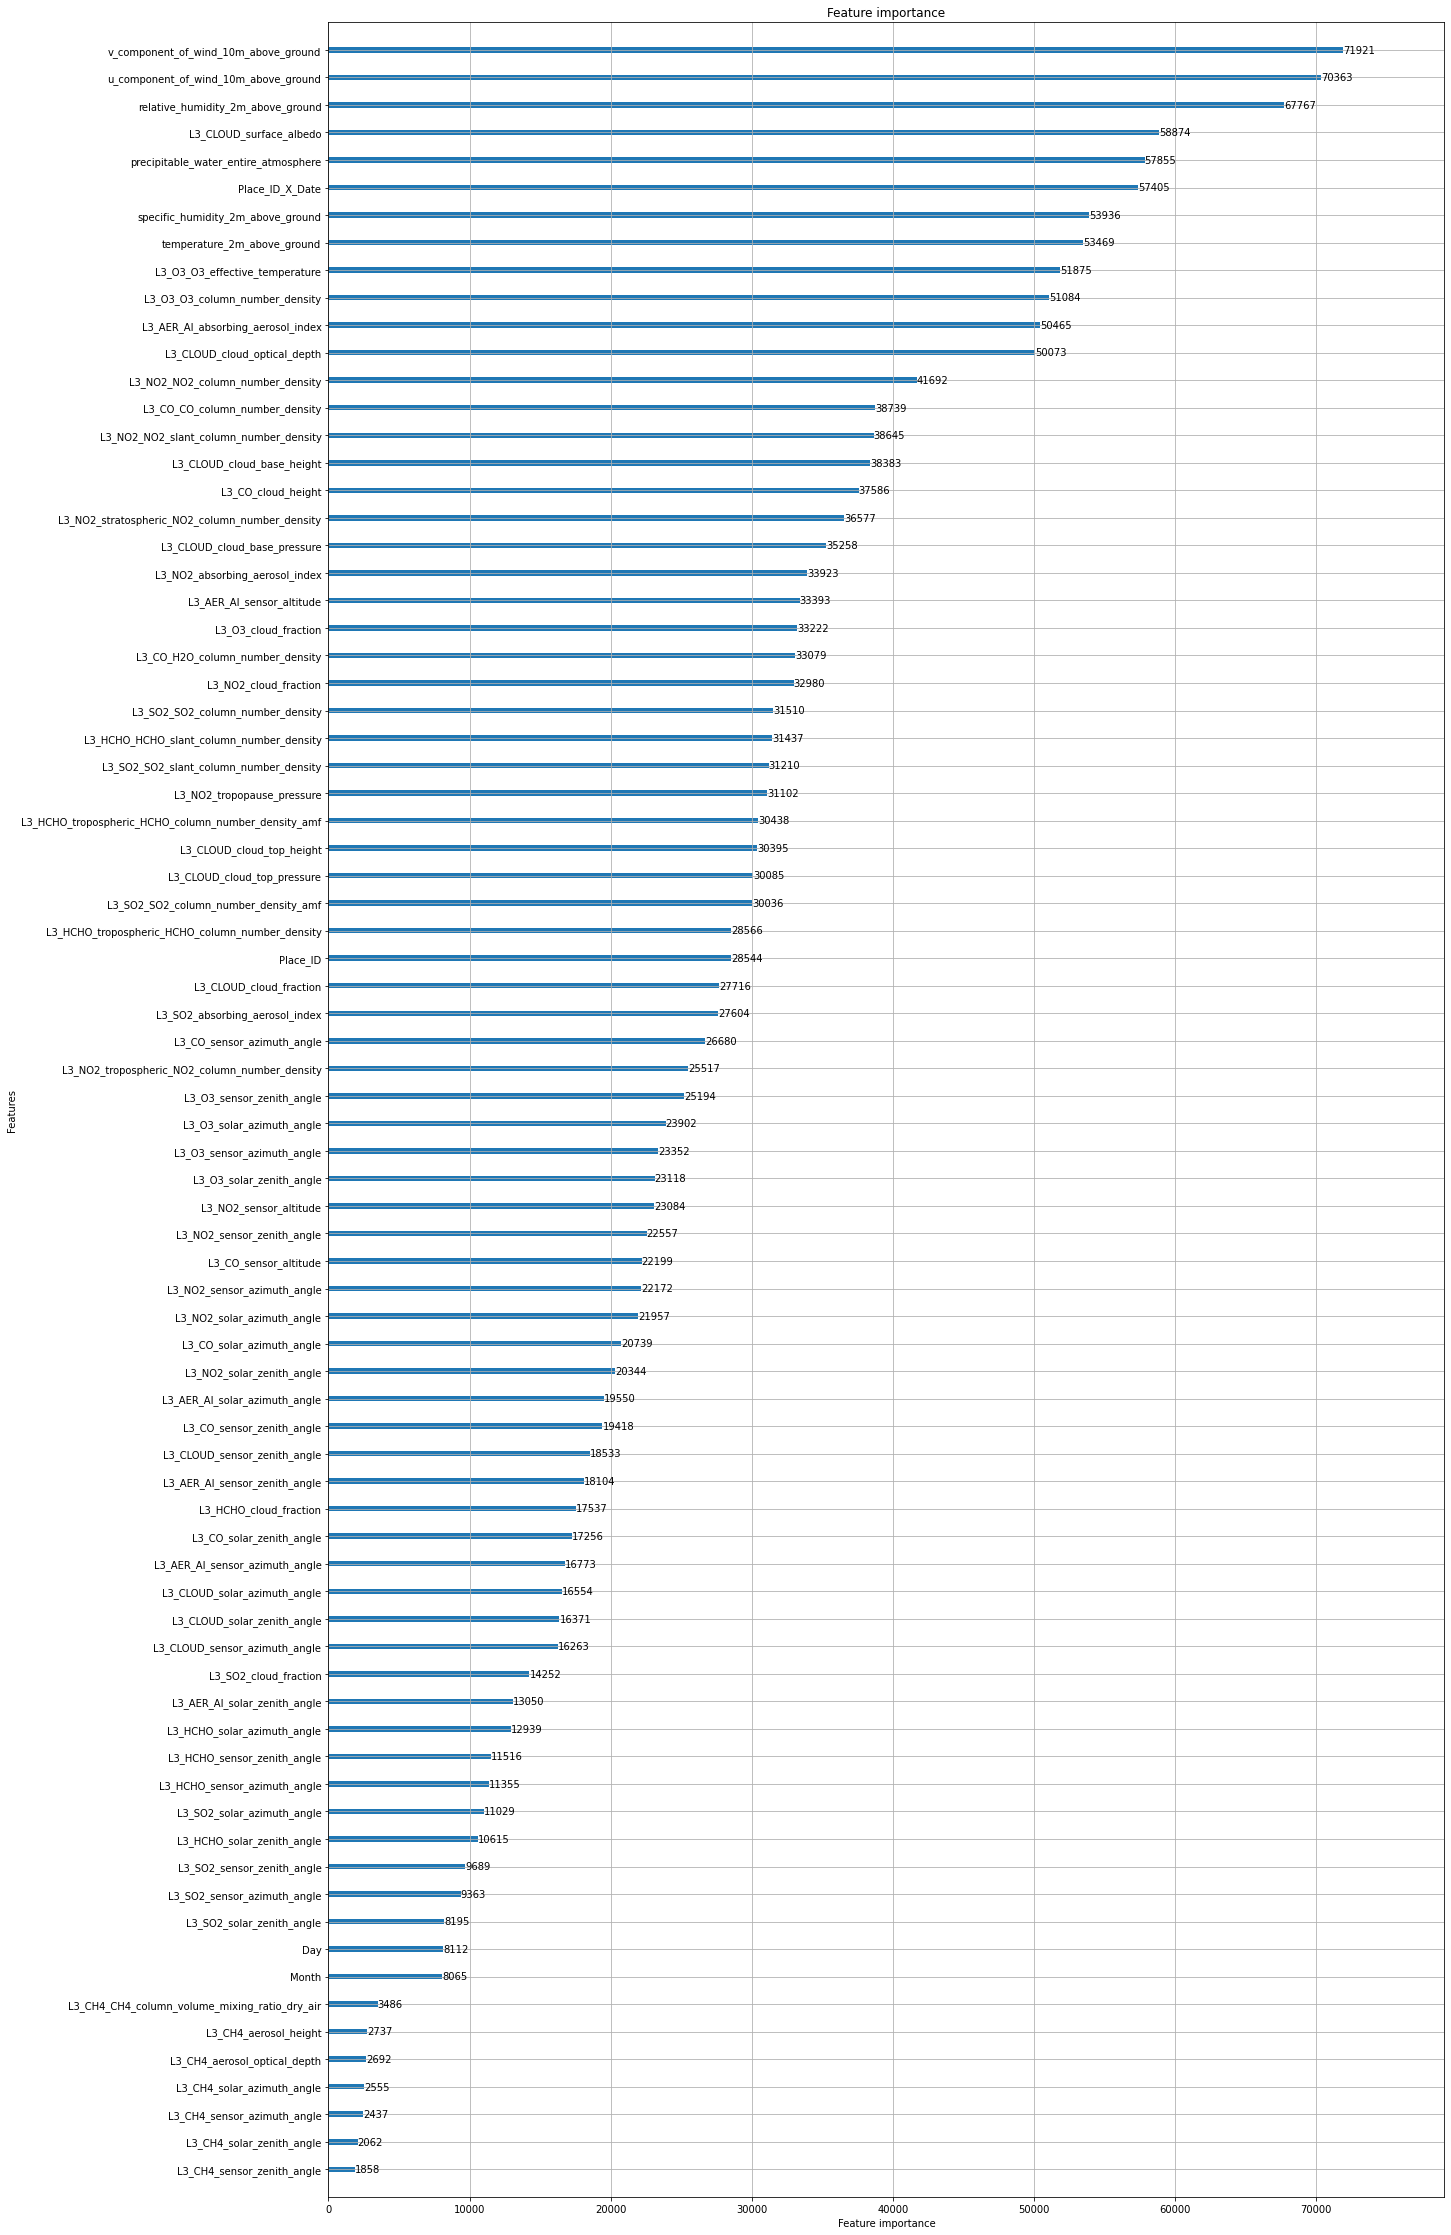

In [34]:
from matplotlib import pyplot as plt
lgb.plot_importance(model, figsize=(20,40))
plt.show()

# FLAML Tuning

from flaml import AutoML
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'rmse',
    "task": 'regression'
}
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings,estimator_list=['lgbm'])

In [78]:
preds = model.predict(X_test)
# Measure model performance
mean_squared_error(y_test, preds, squared=False)

26.31805107508382

In [79]:
preds = model.predict(test)
test1=Test
test1['target']=preds

In [80]:
sub=test1[['Place_ID X Date','target']]
sub.to_csv('mysubmission1.csv', index = False)
sub.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,108.279095
1,0OS9LVX X 2020-01-03,109.389421
2,0OS9LVX X 2020-01-04,94.550842
3,0OS9LVX X 2020-01-05,95.336657
4,0OS9LVX X 2020-01-06,77.266142


In [81]:
sub=test1[['Place_ID X Date','target']]
sub.to_csv('mysubmission2.csv', index = False)
sub.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,108.279095
1,0OS9LVX X 2020-01-03,109.389421
2,0OS9LVX X 2020-01-04,94.550842
3,0OS9LVX X 2020-01-05,95.336657
4,0OS9LVX X 2020-01-06,77.266142


# Make predictions on the Zindi test set
preds = automl.predict(test)

# Create submisiion file to be uploaded to Zindi for scoring
sub = pd.DataFrame({'Place_ID X Date': Test.Place_ID X Date, 'target': preds})
sub.to_csv('mysubmission.csv', index = False)

sub.head()

In [82]:
train.to_csv('Gretl_data.csv', index=False)